In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2


In [2]:
# Set paths
dataset_path = r"C:\Users\naren\OneDrive\Desktop\Foodimages" # Replace with your dataset path
img_size = (224, 224)
batch_size = 128

In [3]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                   rotation_range=20, zoom_range=0.2,
                                   horizontal_flip=True)

train_gen = train_datagen.flow_from_directory(dataset_path, target_size=img_size,
                                              batch_size=batch_size, subset='training',
                                              class_mode='categorical')

val_gen = train_datagen.flow_from_directory(dataset_path, target_size=img_size,
                                            batch_size=batch_size, subset='validation',
                                            class_mode='categorical')

class_names = list(train_gen.class_indices.keys())

Found 5600 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.


In [4]:
# Load base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True

In [5]:
# Add custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
output = Dense(len(class_names), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)


In [6]:
# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, validation_data=val_gen, epochs=5)


C:\Users\naren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 1057s 21s/step - accuracy: 0.5825 - loss: 1.1278 - val_accuracy: 0.1429 - val_loss: 1.9751
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 841s 19s/step - accuracy: 0.8813 - loss: 0.3539 - val_accuracy: 0.1429 - val_loss: 2.0530
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 802s 18s/step - accuracy: 0.9280 - loss: 0.2160 - val_accuracy: 0.1336 - val_loss: 2.0277
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 711s 16s/step - accuracy: 0.9532 - loss: 0.1412 - val_accuracy: 0.1429 - val_loss: 2.0091
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 712s 16s/step - accuracy: 0.9574 - loss: 0.1242 - val_accuracy: 0.1429 - val_loss: 2.0086


In [7]:
calorie_dict = {
    "apple_pie": 296,
    "baby_back_ribs": 400,
    "baklava": 334,
    "beef_carpaccio": 180,
    "beef_tartare": 250,
    "beet_salad": 150,
    "beignets": 290}
# Reverse class index to name
idx_to_class = {v: k for k, v in train_gen.class_indices.items()}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


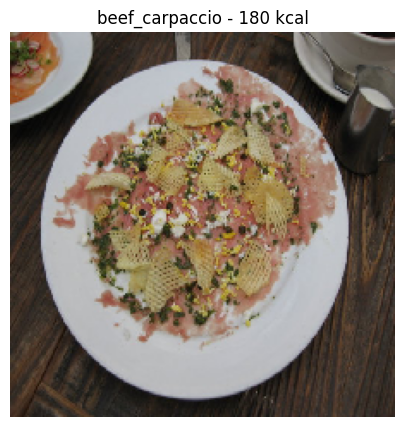

('beef_carpaccio', 180)

In [12]:
def predict_food_and_calories(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_array)
    top_idx = np.argmax(preds)
    food_name = idx_to_class[top_idx]
    calorie_estimate = calorie_dict.get(food_name, "Unknown")

    
 # Display the image and result
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{food_name} - {calorie_estimate} kcal")
    plt.show()

    return food_name, calorie_estimate

# Example usage
image_path = r"C:\Users\naren\OneDrive\Desktop\Foodimages\beef_carpaccio\11466.jpg"
predict_food_and_calories(image_path)